In [1]:
#read a h5 file from folder Re=2500
import h5py
import os

In [2]:
os.getcwd()

'/local/disk1/pylbm_gallery/2D/Karman_vortex_street/Re=250'

In [3]:
#read a bunch of h5 files from folder Re=2500
folder_path = './data_Karman'

In [5]:
# List all files in the folder
files = os.listdir(folder_path)

# Filter to get only .h5 files
h5_files = [f for f in files if f.endswith('.h5')]

# sort according to the number after the underscore in the file name
h5_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

print(h5_files)
print(len(h5_files))

['Karman_0.h5', 'Karman_1.h5', 'Karman_2.h5', 'Karman_3.h5', 'Karman_4.h5', 'Karman_5.h5', 'Karman_6.h5', 'Karman_7.h5', 'Karman_8.h5', 'Karman_9.h5', 'Karman_10.h5', 'Karman_11.h5', 'Karman_12.h5', 'Karman_13.h5', 'Karman_14.h5', 'Karman_15.h5', 'Karman_16.h5', 'Karman_17.h5', 'Karman_18.h5', 'Karman_19.h5', 'Karman_20.h5', 'Karman_21.h5', 'Karman_22.h5', 'Karman_23.h5', 'Karman_24.h5', 'Karman_25.h5', 'Karman_26.h5', 'Karman_27.h5', 'Karman_28.h5', 'Karman_29.h5', 'Karman_30.h5', 'Karman_31.h5', 'Karman_32.h5', 'Karman_33.h5', 'Karman_34.h5', 'Karman_35.h5', 'Karman_36.h5', 'Karman_37.h5', 'Karman_38.h5', 'Karman_39.h5', 'Karman_40.h5', 'Karman_41.h5', 'Karman_42.h5', 'Karman_43.h5', 'Karman_44.h5', 'Karman_45.h5', 'Karman_46.h5', 'Karman_47.h5', 'Karman_48.h5', 'Karman_49.h5', 'Karman_50.h5', 'Karman_51.h5', 'Karman_52.h5', 'Karman_53.h5', 'Karman_54.h5', 'Karman_55.h5', 'Karman_56.h5', 'Karman_57.h5', 'Karman_58.h5', 'Karman_59.h5', 'Karman_60.h5', 'Karman_61.h5', 'Karman_62.h5', '

In [16]:
# Read the first file
file_path = os.path.join(folder_path, h5_files[5])
print(file_path)

# Open the file
f = h5py.File(file_path, 'r')

#print the shape of the data
print(f.keys()) 
print(f['velocity'][:,:,:2].shape)

./data_Karman/Karman_5.h5
<KeysViewHDF5 ['rho', 'velocity', 'x_0', 'x_1']>
(512, 1024, 2)


In [17]:
os.getcwd()

'/local/disk1/pylbm_gallery/2D/Karman_vortex_street/Re=250'

In [18]:
#read all the h5_files  and create a new channel dimension and concatenate them
import numpy as np
import h5py

# Create an empty array to store the velocity data and append the other files to it
velocity_data_list = []
density_data_list = []

folder_path = './data_Karman'

for file in h5_files:
    #concatenate the current directory with the file name
    file_path = os.path.join(folder_path, file)
    with h5py.File(file_path, 'r') as h5f:
        # Assuming 'velocity' is the dataset name; replace it with the actual name if different
        velocity_data = h5f['velocity'][:,:,:2]
        density_data = h5f['rho'][:]
        #print(velocity_data.shape)
        #append directly to an array
        velocity_data_list.append(velocity_data)
        density_data_list.append(density_data)
        #print(len(velocity_data_list))

# Concatenate all the velocity data along the first axis (or modify axis as needed)
print(len(velocity_data_list))
print(len(density_data_list))
#convert list to numpy array


4001
4001


In [19]:
velocity_data_numpy = np.array(velocity_data_list)
print(velocity_data_numpy.shape)
densiry_data_numpy = np.array(density_data_list)
print(densiry_data_numpy.shape)

MemoryError: Unable to allocate 31.3 GiB for an array with shape (4001, 512, 1024, 2) and data type float64

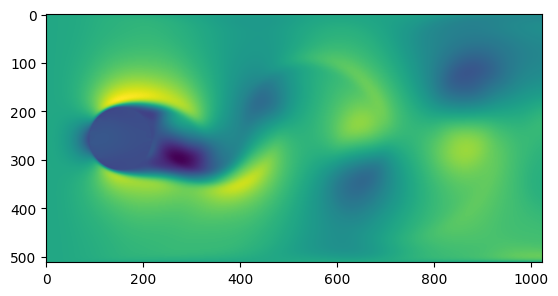

In [10]:
#create a .gif out of the velocity data
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ims = []
for i in range(velocity_data_numpy.shape[0]):
    im = plt.imshow(velocity_data_numpy[i, :, :, 0], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#save the animation as a gif
ani.save('velocity_data_re_250.gif', writer='imagemagick')

In [ ]:
# create a gif for the density data
fig = plt.figure()
ims = []
for i in range(densiry_data_numpy.shape[0]):
    im = plt.imshow(densiry_data_numpy[i, :, :], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#save the animation as a gif
ani.save('density_data_re_250.gif', writer='imagemagick')
